In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [185]:
df_nba = pd.read_csv('/content/drive/MyDrive/Assignment/NBA_data.csv')

In [186]:
df_nba.head()

,Player,Position,Age,Games,Minutes_Played,True_Shooting,Threepoint_Attempt_rate,Free_throw_attempt_rate,Player_Efficiency_Rating
0,Precious Achiuwa,PF,21,28,408.0,0.599,0.000,0.541,15.1
1,Jaylen Adams,PG,24,6,17.0,0.125,0.250,0.000,-6.9
2,Steven Adams,C,27,27,760.0,0.592,NaN,0.397,15.9
3,Bam Adebayo,C,23,26,873.0,0.641,0.015,0.469,22.7
4,LaMarcus Aldridge,C,35,18,480.0,0.542,0.298,0.093,15.2


In [187]:
df_nba.tail()

,Player,Position,Age,Games,Minutes_Played,True_Shooting,Threepoint_Attempt_rate,Free_throw_attempt_rate,Player_Efficiency_Rating
492,Delon Wright,SG,28,28,823.0,0.559,0.298,0.346,16.6
493,Thaddeus Young,PF,32,23,592.0,0.597,0.104,0.169,18.5
494,Trae Young,PG,22,26,901.0,0.598,0.349,0.577,22.9
495,Cody Zeller,C,28,15,361.0,0.569,0.133,0.242,18.2
496,Ivica Zubac,C,23,30,586.0,0.722,0.007,0.500,20.5


In [188]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player                    497 non-null    object 
 1   Position                  497 non-null    object 
 2   Age                       497 non-null    int64  
 3   Games                     497 non-null    int64  
 4   Minutes_Played            495 non-null    float64
 5   True_Shooting             494 non-null    float64
 6   Threepoint_Attempt_rate   495 non-null    float64
 7   Free_throw_attempt_rate   495 non-null    float64
 8   Player_Efficiency_Rating  497 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 35.1+ KB


In [189]:
df_nba.describe()

,Age,Games,Minutes_Played,True_Shooting,Threepoint_Attempt_rate,Free_throw_attempt_rate,Player_Efficiency_Rating
count,497.000000,497.000000,495.000000,494.000000,495.000000,495.000000,497.000000
mean,25.623742,18.456740,416.492929,0.538939,0.406362,0.274804,12.646278
std,4.054229,8.311394,297.543620,0.130360,0.234207,0.270650,7.404316
min,19.000000,1.000000,2.000000,0.000000,0.000000,0.000000,-40.900000
25%,22.000000,12.000000,127.000000,0.500000,0.255000,0.142000,9.300000
50%,25.000000,20.000000,417.000000,0.556000,0.418000,0.227000,12.600000
75%,28.000000,26.000000,665.500000,0.607000,0.566000,0.318000,16.700000
max,37.000000,30.000000,1101.000000,1.500000,1.000000,2.667000,38.700000


In [190]:
df_nba.isnull().sum()

Player                      0
Position                    0
Age                         0
Games                       0
Minutes_Played              2
True_Shooting               3
Threepoint_Attempt_rate     2
Free_throw_attempt_rate     2
Player_Efficiency_Rating    0
dtype: int64

In [191]:
df_nba.isnull().sum()

Player                      0
Position                    0
Age                         0
Games                       0
Minutes_Played              2
True_Shooting               3
Threepoint_Attempt_rate     2
Free_throw_attempt_rate     2
Player_Efficiency_Rating    0
dtype: int64

In [192]:
df_nba['Minutes_Played'].fillna(df_nba.Minutes_Played.mean(),inplace=True)

In [193]:
df_nba['True_Shooting'].fillna(df_nba.True_Shooting.mean(),inplace=True)

In [194]:
df_nba['Threepoint_Attempt_rate'].fillna(df_nba.Threepoint_Attempt_rate.mean(),inplace=True)

In [195]:
df_nba['Free_throw_attempt_rate'].fillna(df_nba.Free_throw_attempt_rate.mean(),inplace=True)

In [196]:
df_nba.isnull().sum()

Player                      0
Position                    0
Age                         0
Games                       0
Minutes_Played              0
True_Shooting               0
Threepoint_Attempt_rate     0
Free_throw_attempt_rate     0
Player_Efficiency_Rating    0
dtype: int64

In [197]:
df_nba.head()

,Player,Position,Age,Games,Minutes_Played,True_Shooting,Threepoint_Attempt_rate,Free_throw_attempt_rate,Player_Efficiency_Rating
0,Precious Achiuwa,PF,21,28,408.0,0.599,0.000000,0.541,15.1
1,Jaylen Adams,PG,24,6,17.0,0.125,0.250000,0.000,-6.9
2,Steven Adams,C,27,27,760.0,0.592,0.406362,0.397,15.9
3,Bam Adebayo,C,23,26,873.0,0.641,0.015000,0.469,22.7
4,LaMarcus Aldridge,C,35,18,480.0,0.542,0.298000,0.093,15.2


In [198]:
df_nba.	Position.value_counts()

SG       122
PF       102
PG        92
C         89
SF        84
G          4
F          2
SF-PF      1
F-C        1
Name: Position, dtype: int64

In [199]:
df_nba.replace({'SG','PF','PG','C','SF','G','F','SF-PF','F-C'},{0,1,2,3,4,5,6,7,8},inplace=True)

In [200]:
x=df_nba.iloc[:,1:8]
y=df_nba.iloc[:,-1]

In [201]:
x

,Position,Age,Games,Minutes_Played,True_Shooting,Threepoint_Attempt_rate,Free_throw_attempt_rate
0,4,21,28,408.0,0.599,0.000000,0.541
1,8,24,6,17.0,0.125,0.250000,0.000
2,3,27,27,760.0,0.592,0.406362,0.397
3,3,23,26,873.0,0.641,0.015000,0.469
4,3,35,18,480.0,0.542,0.298000,0.093
...,...,...,...,...,...,...,...
492,1,28,28,823.0,0.559,0.298000,0.346
493,4,32,23,592.0,0.597,0.104000,0.169
494,8,22,26,901.0,0.598,0.349000,0.577
495,3,28,15,361.0,0.569,0.133000,0.242


In [202]:
y

0      15.1
1      -6.9
2      15.9
3      22.7
4      15.2
       ... 
492    16.6
493    18.5
494    22.9
495    18.2
496    20.5
Name: Player_Efficiency_Rating, Length: 497, dtype: float64

In [203]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [204]:
model = LinearRegression()

In [205]:
model.fit(x_train, y_train)

LinearRegression()

In [206]:
y_pred = model.predict(x_test)

In [207]:
finaldf = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})

In [208]:
finaldf

,Actual,Predicted
483,9.8,15.993762
73,5.4,7.305425
231,10.3,7.847987
175,12.9,15.449348
237,31.4,22.479538
...,...,...
247,21.9,19.730852
383,11.7,11.794115
19,11.2,8.843565
321,13.0,13.374118


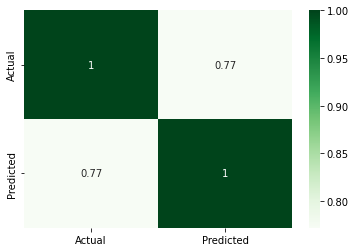

In [209]:
sns.heatmap(finaldf.corr(),annot=True, cmap='Greens')

In [210]:
r2_score(y_test, y_pred)

0.5832912173202427